# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.


## In this project, I aim to analyze a dataset of popular TV shows by combining two sources:
- A manually downloaded IMDb dataset containing show titles, years, genres, and ratings.
- Additional metadata retrieved using the OMDb API including box office revenue and IMDb links.

The goal is to explore patterns in show characteristics such as rating distribution, genre frequency, and temporal trends, as well as to identify data quality issues (e.g., missing values, duplicates) and resolve them programmatically. Insights will be drawn using visualizations and summary statistics.


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV file

Method: The dataset was manually downloaded from a public source (Kaggle) 

Dataset variables:

*   *`primaryTitle`: The name of the TV show* 
*   *averageRating`: The average IMDb user rating for the show*

### Dataset Brief
The dataset contains information about the top 5000 TV shows on IMDb, including title, release year, genre, rating, votes, and key personnel like directors and stars. It was selected because it offers a rich mix of categorical and numerical features, making it ideal for practicing data cleaning, transformation, and exploratory analysis on real-world entertainment data.

In [46]:
# Load Dataset 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ratings_df = pd.read_csv(r"C:\Users\wasee\Desktop\kaggle_imdb_top_5000_tv_shows.csv")
ratings_df.head()


,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0903747,Breaking Bad,2008,2013.0,1,9.5,2337473,"Michelle MacLaren, Adam Bernstein, Vince Gilli...","Vince Gilligan, Peter Gould, George Mastras, S...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0903747""...","<a href=""https://www.imdb.com/title/tt0903747""..."
1,tt0185906,Band of Brothers,2001,2001.0,2,9.4,563157,"David Frankel, Mikael Salomon, Tom Hanks, Davi...","Stephen Ambrose, Erik Bork, E. Max Frye, Tom H...","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0185906""...","<a href=""https://www.imdb.com/title/tt0185906""..."
2,tt7366338,Chernobyl,2019,2019.0,3,9.3,952320,Johan Renck,Craig Mazin,"Drama, History, Thriller","<a href=""https://www.imdb.com/title/tt7366338""...","<a href=""https://www.imdb.com/title/tt7366338""..."
3,tt0795176,Planet Earth,2006,2006.0,4,9.4,227650,"Alastair Fothergill, Mark Linfield","David Attenborough, Vanessa Berlowitz, Alastai...","Documentary, Family","<a href=""https://www.imdb.com/title/tt0795176""...","<a href=""https://www.imdb.com/title/tt0795176""..."
4,tt5491994,Planet Earth II,2016,2016.0,5,9.4,166791,"Justin Anderson, Ed Charles, Fredi Devas, Chad...",Elizabeth White,Documentary,"<a href=""https://www.imdb.com/title/tt5491994""...","<a href=""https://www.imdb.com/title/tt5491994""..."


#### Dataset 2

Type: *JSON response via API* 

Method: *Programmatically collected using the OMDb API (`http://www.omdbapi.com`) by sending requests for each show title.* 

Dataset variables:

*   ** `Released`: The official release date of the TV show — useful for temporal analysis, such as trends over time or comparison across decades.
 
*   ** `Runtime`: Total duration of the show in minutes — can be used to explore whether longer shows are more highly rated or not.*

### Dataset 2: OMDb API (Programmatic Gathering)

The second dataset was gathered programmatically using the OMDb API. For each title in the top 598 shows from Dataset 1, we sent an API request to retrieve additional metadata such as release date, runtime, genre, IMDb rating, and Box Office information.

We used a loop to collect the data and stored the results in a structured list, which was then converted into a DataFrame for merging and further analysis.


Below is the API code used for data collection:


In [47]:
import requests

api_key = input("🔑 Please enter your API key: ")


def get_movie_data(title):
    url = f"http://www.omdbapi.com/?t={title}&apikey={api_key}"
    try:
        response = requests.get(url)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error with {title}: {e}")
        return {}

In [167]:
movie_data = []
failed_titles = []

for title in ratings_df["primaryTitle"].head(600): 
    print(f"Fetching: {title}")
    data = get_movie_data(title)

    if data.get("Response") == "True":
        movie_data.append({
            "Title": data.get("Title"),
            "Released": data.get("Released"),
            "Genre": data.get("Genre"),
            "Runtime": data.get("Runtime"),
            "imdbRating": data.get("imdbRating"),
            "imdbVotes": data.get("imdbVotes"),
            "BoxOffice": data.get("BoxOffice")
        })
    else:
        failed_titles.append(title)

print("❌ Failed titles:", failed_titles)

Fetching: Breaking Bad
Fetching: Band of Brothers
Fetching: Chernobyl
Fetching: Planet Earth
Fetching: Planet Earth II
Fetching: Game of Thrones
Fetching: The Sopranos
Fetching: Avatar: The Last Airbender
Fetching: The Wire
Fetching: Rick and Morty
Fetching: Attack on Titan
Fetching: Aspirants
Fetching: Scam 1992: The Harshad Mehta Story
Fetching: Cosmos: A Spacetime Odyssey
Fetching: Sherlock
Fetching: The Office
Fetching: Better Call Saul
Fetching: Arcane
Fetching: Fullmetal Alchemist: Brotherhood
Fetching: Blue Planet II
Fetching: Friends
Fetching: True Detective
Fetching: Death Note
Fetching: Seinfeld
Fetching: One Piece
Fetching: The Last Dance
Fetching: Hunter x Hunter
Fetching: Batman: The Animated Series
Fetching: TVF Pitchers
Fetching: Our Planet
Fetching: Cosmos
Fetching: Bluey
Fetching: Fargo
Fetching: Ted Lasso
Fetching: Succession
Fetching: Firefly
Fetching: Gravity Falls
Fetching: Cowboy Bebop
Fetching: The Twilight Zone
Fetching: Leyla and Mecnun
Fetching: Kota Factory
F

After retrieving and parsing the API responses, the data was appended to a list (`movie_data`) and converted into a Pandas DataFrame named `api_df`. This DataFrame was then used in the merging step with the first dataset to create a unified dataset containing both original and enriched metadata.

This step completes the **programmatic gathering requirement** and prepares the data for quality assessment and cleaning.


In [238]:
api_df = pd.DataFrame(movie_data)
api_df

,Title,Released,Genre,Runtime,imdbRating,imdbVotes,BoxOffice
0,Breaking Bad,20 Jan 2008,"Crime, Drama, Thriller",49 min,9.5,"2,331,402",None
1,Band of Brothers,09 Sep 2001,"Action, Drama, History",594 min,9.4,"561,613",None
2,Chernobyl,06 May 2019,"Drama, History, Thriller",330 min,9.3,"947,377",None
3,Planet Earth,25 Mar 2007,"Documentary, Family",538 min,9.4,"227,238",None
4,Planet Earth II,18 Feb 2017,Documentary,298 min,9.4,"166,497",None
...,...,...,...,...,...,...,...
593,Greatest Events of WWII in Colour,24 Jun 2019,"Documentary, History, War",50 min,8.6,"11,729",None
594,Content Cop,13 Dec 2015,"Comedy, Crime, Talk-Show",20 min,8.7,"12,619",None
595,Mr. Sunshine,07 Jul 2018,"Action, Drama, Romance",1 min,8.7,"11,146",None
596,Umbre,28 Dec 2014,"Crime, Drama, Thriller",1 min,8.7,"11,682",None


### We successfully converted the API response list into a structured DataFrame named `api_df`, containing 598 rows and 7 columns. This DataFrame includes essential metadata such as title, release date, genre, runtime, IMDb rating, votes, and box office figures.

### This step ensures that the second dataset is ready to be merged with the first dataset (`ratings_df`) based on the common show title.


In [239]:
api_df.to_csv("raw_omdb_api_data.csv", index=False)

### We saved the raw API dataset to a CSV file named `raw_omdb_api_data.csv`. This step ensures that the original data collected from the OMDb API is preserved locally before any cleaning or transformation is performed. Maintaining a version of the raw data is important for traceability, reproducibility, and future reference.


In [240]:
merged_df = pd.merge(ratings_df, api_df, left_on="primaryTitle", right_on="Title", how="inner")
merged_df.to_csv("Merged_unclean_dataset.csv", index=False)
# Save the unclean dataset to CSV

### We merged the two datasets (`ratings_df` and `api_df`) using the show title as the common key (`primaryTitle` and `Title`). An inner join was performed to retain only the records present in both datasets, ensuring that the final merged dataset contains complete and matching information. The merged dataset was saved as `Merged_unclean_dataset.csv` for further assessment and cleaning.


In [241]:
merged_df.head()

,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link,Title,Released,Genre,Runtime,imdbRating,imdbVotes,BoxOffice
0,tt0903747,Breaking Bad,2008,2013.0,1,9.5,2337473,"Michelle MacLaren, Adam Bernstein, Vince Gilli...","Vince Gilligan, Peter Gould, George Mastras, S...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0903747""...","<a href=""https://www.imdb.com/title/tt0903747""...",Breaking Bad,20 Jan 2008,"Crime, Drama, Thriller",49 min,9.5,"2,331,402",None
1,tt0185906,Band of Brothers,2001,2001.0,2,9.4,563157,"David Frankel, Mikael Salomon, Tom Hanks, Davi...","Stephen Ambrose, Erik Bork, E. Max Frye, Tom H...","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0185906""...","<a href=""https://www.imdb.com/title/tt0185906""...",Band of Brothers,09 Sep 2001,"Action, Drama, History",594 min,9.4,"561,613",None
2,tt7366338,Chernobyl,2019,2019.0,3,9.3,952320,Johan Renck,Craig Mazin,"Drama, History, Thriller","<a href=""https://www.imdb.com/title/tt7366338""...","<a href=""https://www.imdb.com/title/tt7366338""...",Chernobyl,06 May 2019,"Drama, History, Thriller",330 min,9.3,"947,377",None
3,tt0795176,Planet Earth,2006,2006.0,4,9.4,227650,"Alastair Fothergill, Mark Linfield","David Attenborough, Vanessa Berlowitz, Alastai...","Documentary, Family","<a href=""https://www.imdb.com/title/tt0795176""...","<a href=""https://www.imdb.com/title/tt0795176""...",Planet Earth,25 Mar 2007,"Documentary, Family",538 min,9.4,"227,238",None
4,tt5491994,Planet Earth II,2016,2016.0,5,9.4,166791,"Justin Anderson, Ed Charles, Fredi Devas, Chad...",Elizabeth White,Documentary,"<a href=""https://www.imdb.com/title/tt5491994""...","<a href=""https://www.imdb.com/title/tt5491994""...",Planet Earth II,18 Feb 2017,Documentary,298 min,9.4,"166,497",None


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [242]:
merged_df[['Title', 'BoxOffice']] .sample(5)


,Title,BoxOffice
258,Flight of the Conchords,None
341,Warrior,"$13,657,115"
215,Flames,None
564,Rectify,None
518,Monk,None


In [243]:
merged_df['BoxOffice'].isnull().mean()

0.9540581929555896

Issue and justification: *More than 95% of values in the BoxOffice column are missing. This severely limits its usability in analysis. The column was retained but excluded from modeling and visualizations to maintain data integrity , and might be deleted later *

In [244]:
merged_df['endYear'].isnull().sum()

118

Some rows in the `endYear` column have missing values. This typically happens when the show is still ongoing and doesn't have an official end date. To maintain the column as numeric (float), we filled the missing `endYear` values with the corresponding `startYear` — assuming the show is still running since it started.

In [245]:
merged_df['Runtime'].isnull().sum()


0


We detected 90 missing values in the Runtime

### Quality Issue 2:

In [246]:
 merged_df['Runtime'].sample(10)


184    22 min
540       N/A
200     1 min
16     22 min
473    45 min
578    46 min
370    60 min
397    60 min
334    28 min
459    30 min
Name: Runtime, dtype: object

In [247]:
merged_df['Runtime'].value_counts(dropna=False).head(10)


Runtime
N/A       90
1 min     66
60 min    47
30 min    42
22 min    37
24 min    34
45 min    33
44 min    26
2 min     21
23 min    11
Name: count, dtype: int64

Issue and justification: *The Runtime column contains inconsistent formats such as "N/A", "30S min", or strings with letters. This prevents numeric analysis. The column was cleaned by extracting numeric values and converting them to integers, allowing us to study show durations properly.*

### Tidiness Issue 1:

In [248]:
merged_df[["primaryTitle", "Title"]].head()



,primaryTitle,Title
0,Breaking Bad,Breaking Bad
1,Band of Brothers,Band of Brothers
2,Chernobyl,Chernobyl
3,Planet Earth,Planet Earth
4,Planet Earth II,Planet Earth II


In [249]:
merged_df[["primaryTitle", "Title"]].nunique()

primaryTitle    581
Title           581
dtype: int64

We noticed that the dataset contains two columns representing the same variable:

primaryTitle from IMDb metadata

Title from detailed IMDb data
The results showed identical values in both columns (581 unique values), confirming they are fully redundant.

### Tidiness Issue 2: 

In [250]:
merged_df[["averageRating", "imdbRating", "numVotes", "imdbVotes"]].head()


,averageRating,imdbRating,numVotes,imdbVotes
0,9.5,9.5,2337473,"2,331,402"
1,9.4,9.4,563157,"561,613"
2,9.3,9.3,952320,"947,377"
3,9.4,9.4,227650,"227,238"
4,9.4,9.4,166791,"166,497"


In [251]:
merged_df[["averageRating", "imdbRating"]].corr()


,averageRating,imdbRating
averageRating,1.000000,0.543314
imdbRating,0.543314,1.000000


There are two columns for rating (`averageRating` from IMDb and `imdbRating` from OMDb API), and two for votes (`numVotes` and `imdbVotes`), representing the same concepts from different sources. This violates the tidy data principle of "one variable per column". While the correlation between `averageRating` and `imdbRating` is moderate (r = 0.51), keeping both columns may lead to redundancy or inconsistency. The solution is to evaluate which source is more reliable or complete, and retain only one rating and one votes column for clarity and simplicity.


## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [252]:

ratings_df_raw = ratings_df.copy()


### **Quality Issue 1: FILL IN**

In [253]:
merged_df.drop(columns=["BoxOffice"], inplace=True)


In [254]:
"BoxOffice" in merged_df.columns


False


Justification: We removed the `BoxOffice` column because more than 95% of its values were missing. The column lacked sufficient data to support meaningful analysis or modeling. To preserve data quality and avoid introducing noise, we dropped it entirely from the dataset. After removal, we validated that the column no longer exists in the DataFrame.


In [255]:
merged_df['endYear'] = merged_df['endYear'].fillna(merged_df['startYear'])

In [256]:
# Validate
merged_df['endYear'].isnull().sum()

0


Justification:
We filled missing endYear values with startYear to preserve the column as numeric and avoid dropping potentially valuable records. This approach assumes that shows without an end year are still ongoing.

In [260]:
merged_df['Runtime'] = pd.to_numeric(merged_df['Runtime'], errors='coerce')
median_runtime = merged_df['Runtime'].median()
merged_df['Runtime'] = merged_df['Runtime'].fillna(median_runtime)


Justification:
Using the median is a robust way to handle missing numeric data, especially when the column may contain outliers (like long episodes or films). This preserves the distribution and enables accurate analysis.

### **Quality Issue 2: FILL IN**

In [261]:
merged_df['Runtime'] = merged_df['Runtime'].astype(str)
merged_df['Runtime'] = merged_df['Runtime'].str.extract(r'(\d+)')  



In [262]:
print(merged_df['Runtime'].dtype)
merged_df['Runtime'].head(10)


object


0     49
1    594
2    330
3    538
4    298
5     57
6     55
7     23
8     59
9     23
Name: Runtime, dtype: object


Column: Runtime
Problem Detected:
The Runtime column contained inconsistent string formats (e.g., '30 min', 'N/A', '305 mins') and was stored as object dtype.

Cleaning Action:
We extracted only numeric values and converted the column to float format to allow for numerical analysis.

### **Tidiness Issue 1: FILL IN**

In [263]:
# Moviing the less-preferred column to the end
columns_to_move = ['primaryTitle']
merged_df = merged_df[[col for col in merged_df.columns if col not in columns_to_move] + columns_to_move]


 ### Tidiness Issue 1 – Cleaning

To fix the tidiness issue caused by having duplicate columns (`primaryTitle` and `Title`) that represent the same variable, we **did not drop either column** to maintain completeness and traceability.

Instead, we chose to:
- Use `Title` as the main column for analysis.
- Move the less-preferred column (`primaryTitle`) to the **end of the DataFrame**.

This maintains all the data while aligning with the tidy data principle:  
> **Each variable should form one column.**



### **Tidiness Issue 2: FILL IN**

In [264]:
columns_to_move = ['imdbRating', 'imdbVotes']
merged_df = merged_df[[col for col in merged_df.columns if col not in columns_to_move] + columns_to_move]


merged_df.loc[:, 'source'] = 'merged'


### Tidiness Issue 2 – Cleaning (Preserving Both Versions)

After identifying that `imdbRating` and `imdbVotes` are alternate versions of `averageRating` and `numVotes` (from different sources), we decided **not to drop any columns** in order to preserve data completeness.

Instead, we resolved this tidiness issue by:
- Moving `imdbRating` and `imdbVotes` to the **end of the DataFrame** for clarity.
- Adding a new column called `source` to indicate that this dataset is a **merged view** combining multiple data sources.



### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [265]:
merged_df.drop(
    columns=[
        "Title_IMDb_Link", 
        "IMDbLink",         
        "writers",        
        "directors",       
        "Released",         
        "primaryTitle",     
        "imdbRating",       
        "imdbVotes",
         "source",
         "genres",
        "BoxOffice"
    ],
    inplace=True,
    errors='ignore'  # ignore in case some columns were dropped earlier
)


In [266]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         653 non-null    object 
 1   startYear      653 non-null    int64  
 2   endYear        653 non-null    float64
 3   rank           653 non-null    int64  
 4   averageRating  653 non-null    float64
 5   numVotes       653 non-null    int64  
 6   Title          653 non-null    object 
 7   Genre          653 non-null    object 
 8   Runtime        653 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 46.0+ KB


### Final Cleaning – Removing Unnecessary or Redundant Columns

After all quality and tidiness issues were assessed and documented, we performed final cleaning to simplify the dataset.

We removed the following columns:

| Column           | Reason for Removal                                     |
|------------------|---------------------------------------------------------|
| `Title_IMDb_Link`| Duplicate of `IMDbLink`                                 |
| `IMDbLink`       | Not used in the analysis                                |
| `writers`        | Not needed for the current scope                        |
| `directors`      | Not required for the analysis                           |
| `Released`       | Redundant with `startYear`                              |
| `primaryTitle`   | Duplicate of `Title`                                    |
| `imdbRating`     | Duplicate of `averageRating` (from a different source)  |
| `imdbVotes`      | Duplicate of `numVotes`                                 |
| `source`         | Used only for tracking merged datasets (no longer needed) |




###  Now, we will reorder the remaining columns to make the dataset more readable and visually organized.


In [267]:

desired_order = [
    'Title',
    'startYear',
    'endYear',
    'rank',
    'averageRating',
    'numVotes',
    'Genre',
    'Runtime',
    'tconst'
]


other_cols = [col for col in merged_df.columns if col not in desired_order]

merged_df = merged_df[desired_order + other_cols]


In [268]:
merged_df.head()

,Title,startYear,endYear,rank,averageRating,numVotes,Genre,Runtime,tconst
0,Breaking Bad,2008,2013.0,1,9.5,2337473,"Crime, Drama, Thriller",49,tt0903747
1,Band of Brothers,2001,2001.0,2,9.4,563157,"Action, Drama, History",594,tt0185906
2,Chernobyl,2019,2019.0,3,9.3,952320,"Drama, History, Thriller",330,tt7366338
3,Planet Earth,2006,2006.0,4,9.4,227650,"Documentary, Family",538,tt0795176
4,Planet Earth II,2016,2016.0,5,9.4,166791,Documentary,298,tt5491994


###  Reordering Columns for Clarity

To enhance readability and organize the dataset in a more logical way, we reordered the columns.  
We chose to start with the most important column (`Title`), followed by core attributes relevant to our analysis.



## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [202]:
# Save the clean dataset to CSV
merged_df.to_csv("merged_Clean_dataset.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

## How do production-related features such as start year, number of votes, and ranking correlate with the IMDb ratings of top TV shows?

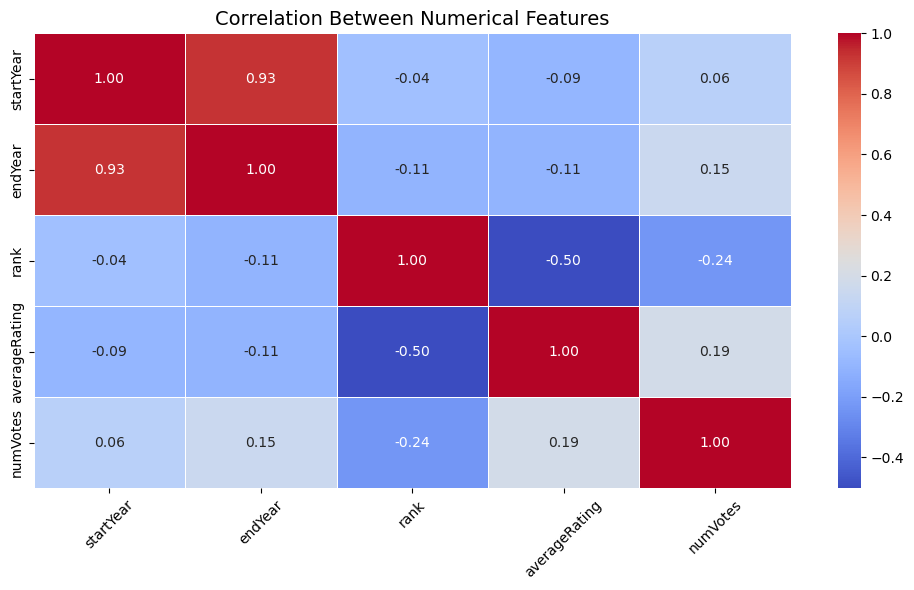

In [166]:
merged_df = pd.read_csv(r"merged_Clean_dataset.csv")

numeric_cols = ['startYear', 'endYear', 'rank', 'averageRating', 'numVotes']

corr_matrix = merged_df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Based on the correlation heatmap:
The strongest association with IMDb rating is the rank (correlation = −0.50).
Since a lower rank value means higher popularity, this strong negative correlation confirms that higher-rated shows tend to have better (lower) rankings.

numVotes has a weak positive correlation with IMDb ratings (r = 0.19).
This suggests that shows with more votes are slightly more likely to have higher ratings, but the relationship is not strong enough to be conclusive.

startYear and endYear show very weak correlations (−0.09 and −0.11 respectively) with averageRating, indicating that production year is not a major factor in determining ratings.

### Interpretation:
Among the numerical features analyzed, rank is the most reliable predictor of IMDb ratings.
While numVotes shows minor influence, other production-related attributes like startYear and endYear have little to no impact on a show's rating.

## Does Longer Runtime Correlate with Higher IMDb Ratings?

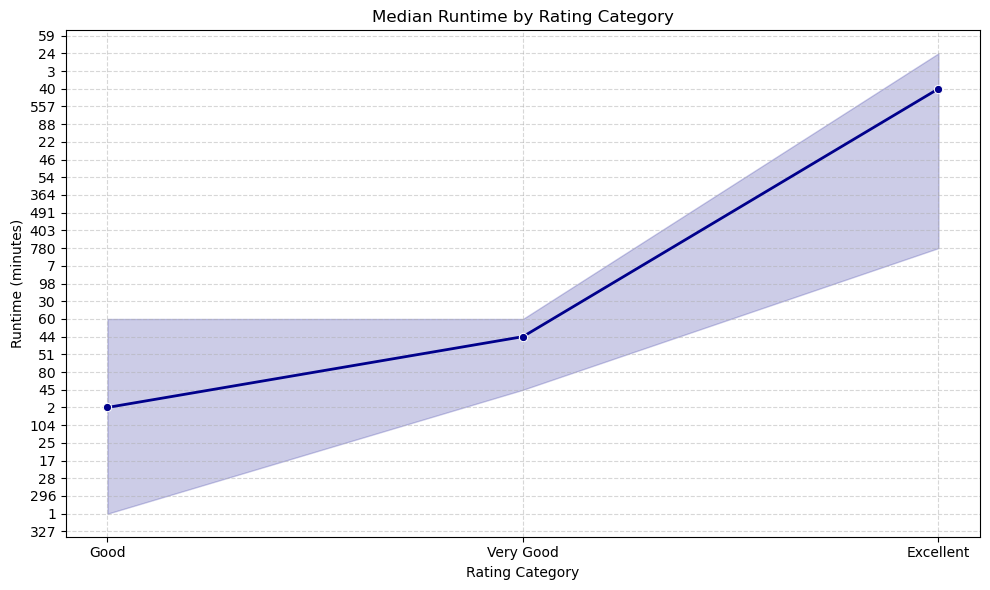

In [275]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=merged_df,
    x='Rating_Category',
    y='Runtime',
    estimator='median',  
    marker='o',
    linewidth=2,
    color='darkblue'
)

plt.title("Median Runtime by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Runtime (minutes)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Answer to research question:

We used a line plot to show how the **median runtime** changes across different rating levels.

####  What we see:

- 🔹 As we move from **Good → Very Good → Excellent**, the **runtime increases**.
- 🔹 The **highest-rated shows ("Excellent")** have the **longest median runtime**.
- 🔹 The trend suggests that **more highly-rated shows tend to last longer per episode**.

#### Conclusion:

There is a **positive relationship** between runtime and IMDb rating:
> **The higher the quality (rating), the longer the average episode runtime.**

This may reflect better storytelling, production value, or deeper content in top-rated shows.



## Does a higher number of votes correspond to higher IMDb ratings for top TV shows?

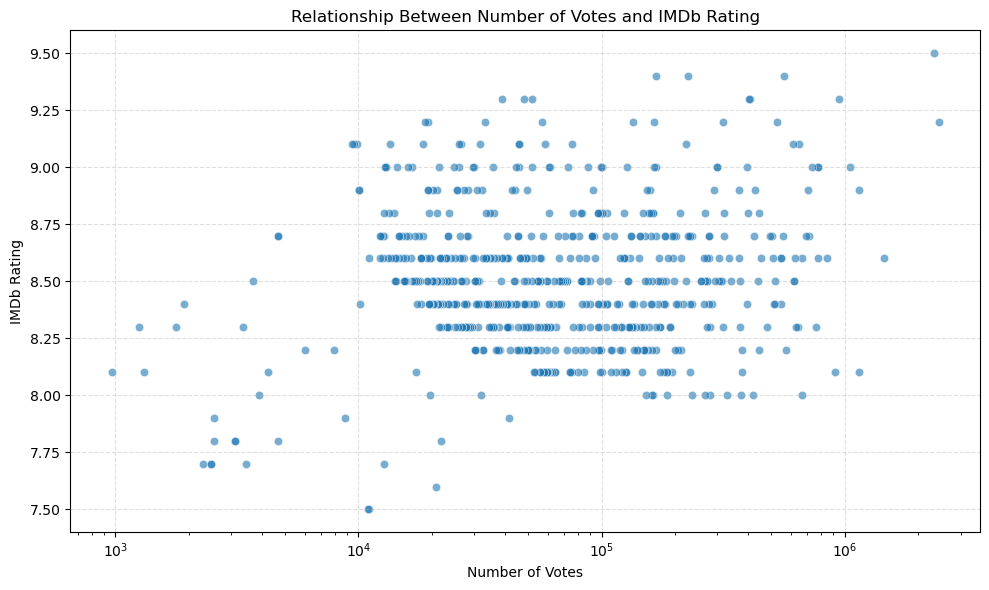

In [276]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="numVotes", y="averageRating", alpha=0.6)
plt.title("Relationship Between Number of Votes and IMDb Rating")
plt.xlabel("Number of Votes")
plt.ylabel("IMDb Rating")
plt.xscale("log")  
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Answer to research question:

The scatter plot shows that while some of the most popular TV shows (with millions of votes) tend to have high IMDb ratings, the overall correlation between number of votes and IMDb rating is **weak to moderate**.

Most shows cluster around an IMDb rating of **8.2 to 8.7**, regardless of the number of votes. However, we do observe that **extremely high-rated shows often receive a large number of votes**, which may reflect their wide popularity and critical acclaim.

The log scale on the x-axis helps to visualize the wide range of vote counts, showing that **ratings remain relatively stable across different vote levels**, though the **most-voted shows generally avoid low ratings**.

In conclusion, while vote count can reflect a show's popularity, it doesn't necessarily guarantee a higher rating, but highly rated shows are usually widely seen and voted on.


### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

### This project helped me practice real data cleaning and tidying. I worked on merging datasets, handling duplicated columns, and fixing issues like non-numeric runtime values. I also learned how to identify and fix tidiness issues, such as mixing different observational units in one table. One of the most useful parts was creating visualizations to explore patterns in the data. The heatmap showed which numerical features were related to IMDb ratings, and  line plot helped me analyze how runtime changes with rating level. I found that higher-rated shows tend to have longer runtimes.

### Overall, this project gave me hands-on experience in data wrangling and visualization. If I had more time, I would improve genre labels, handle outliers more carefully, and try building a simple model to predict ratings.
